In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
df =  pd.read_csv(r'D:\Downloads\avocado-prices\avocado.csv', error_bad_lines = False, encoding='latin-1')

In [4]:
df = df.drop(['Unnamed: 0','Total Volume','4046','4225', '4770', 'Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region'], axis=1)

In [9]:
df.head()

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


In [6]:
df.columns = ['ds','y']

In [8]:
df.ds = pd.to_datetime(df.ds)

In [22]:
p = Prophet()
p.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
future = p.make_future_dataframe(periods = 365, include_history = True)
forecast = p.predict(future)

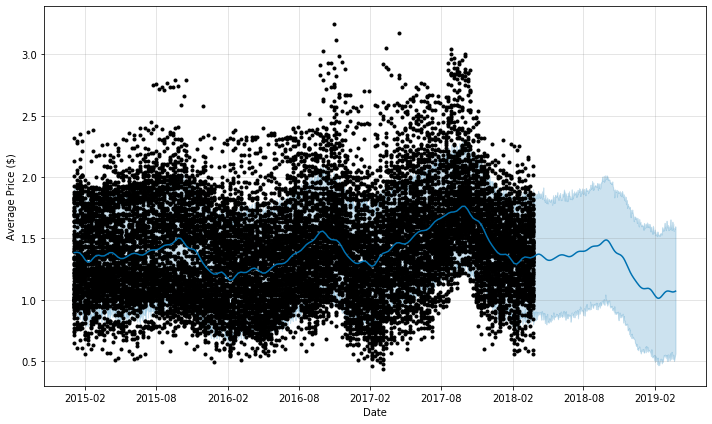

In [24]:
figure = p.plot(forecast, xlabel='Date', ylabel='Average Price ($)')

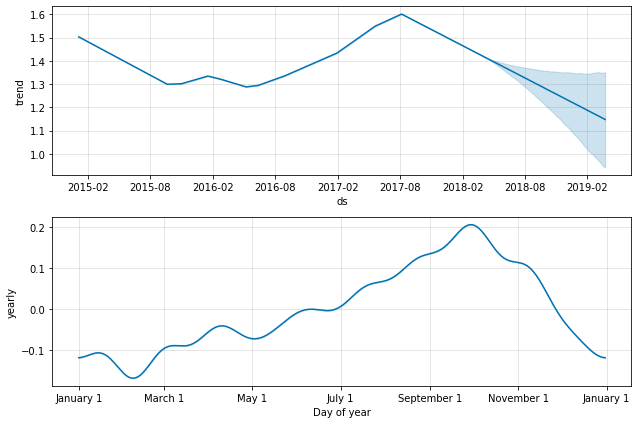

In [25]:
figure2 = p.plot_components(forecast)